# Curso Data Science do Zero - Minerando Dados

## **Discretização**

Consists in replace numbers to names our classifications

##### importando a biblioteca pandas

In [2]:
import pandas as pd

##### cojunto de dados de exemplo

In [3]:
altura = [1.50,1.57,1.62,1.70,1.85,1.90]

##### aplicando a discretização em 3 bins de tamanho igual e com os labels P, M e G

In [4]:
altura = pd.qcut(altura,3,labels=['P','M','G'])

In [5]:
print(altura)

['P', 'P', 'M', 'M', 'G', 'G']
Categories (3, object): ['P' < 'M' < 'G']


##### verificando a quantidade de objetos em cada bin

In [6]:
altura.value_counts()

P    2
M    2
G    2
dtype: int64

##### lendo a base de dados

In [7]:
dataset = pd.read_csv('kc_house_data.csv')

##### contando o número de pisos

In [8]:
dataset['floors'].value_counts()

1.0    9704
2.0    6169
1.5    1729
3.0     293
2.5     116
3.5       5
Name: floors, dtype: int64

##### discretizando os valores do atributo floors e armazenando o resultado no atributo floors_labels

In [13]:
dataset['floors_labels'] = pd.cut(
    dataset['floors'],
    5, # You can choose how many 'classification' will use to replace numbers 
    labels=['One-Floor','Two-Floors','Medium-size','Big-Size','Three-Floors']
)

##### verificando o novo atributo

In [11]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_labels
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,One-Floor
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,Two-Floors
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,One-Floor
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,One-Floor
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,One-Floor
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,3.0,11.0,3890.0,1530.0,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930.0,One-Floor
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,3.0,7.0,1715.0,0.0,1995.0,0.0,98003.0,47.3097,-122.327,2238.0,6819.0,Two-Floors
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,3.0,7.0,1060.0,0.0,1963.0,0.0,98198.0,47.4095,-122.315,1650.0,9711.0,One-Floor
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,3.0,7.0,1050.0,730.0,1960.0,0.0,98146.0,47.5123,-122.337,1780.0,8113.0,One-Floor
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,3.0,7.0,1890.0,0.0,2003.0,0.0,98038.0,47.3684,-122.031,2390.0,7570.0,Two-Floors


##### verificando os valores únicos do atributo

In [14]:
dataset['floors_labels'].unique()

['One-Floor', 'Two-Floors', NaN, 'Big-Size', 'Medium-size', 'Three-Floors']
Categories (5, object): ['One-Floor' < 'Two-Floors' < 'Medium-size' < 'Big-Size' < 'Three-Floors']

##### contagem de valores em cada bin ou categoria

In [15]:
dataset['floors_labels'].value_counts()

One-Floor       11433
Two-Floors       6169
Big-Size          293
Medium-size       116
Three-Floors        5
Name: floors_labels, dtype: int64

## **Normalization**

Apply the same rule to all data from your dataset. Tornar os dados proximos da normalizaçao normal, centralizado à média.

##### importando as bibliotecas necessárias.

In [16]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### alguns dados de exemplo

In [17]:
data = [
    [-1, 2],
    [0.5, 6],
    [0, 10],
    [1, 18]
]
print (data)

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]


#### valor da média

In [18]:
print (np.mean(data))

4.5625


#### visualizando a distribuição dos dados

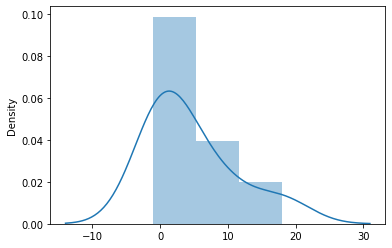

In [19]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

##### instanciando o objeto Normalize

In [20]:
normalizer = Normalizer().fit(data)

##### aplicando a normalização nos dados de exemplo utilizando a norma l2

In [21]:
data2 = normalizer.transform(data)
print(data2)

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


#### Alterando a forma dos dados para apenas uma dimensão

In [22]:
data2 = data2.reshape(-1)

#### valor da média

In [23]:
print(np.mean(data2))

0.4475919008033141


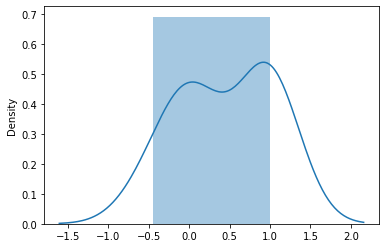

In [24]:
sns.distplot(data2)
plt.show()

## **Standartization**

Assume que não tenha valores discrepantes de dados. Transforma em média próxima a 0 e desvio padrão próximo a 1. Ou seja, numeros com escala de 0 a 1, onde maior valor é 1 e menor 0. Altera somente a faixa de valores.

In [25]:
data = np.random.normal(size = 50)
print(data)

[ 0.98511435 -1.13228199  2.03436605  0.30577563 -0.69374409 -0.139411
 -1.47035243  0.62482144  1.09256921 -0.11722158 -1.4794546   0.27018583
 -0.37421499  0.19498756 -1.78294235  2.13577481  0.10260487  1.33738194
  0.81788454 -0.49193004  0.28599388 -0.23366817 -1.7805305   0.61943742
 -0.57430503 -0.25550704 -0.01125719  0.9715626   0.29701835 -0.46437064
 -1.18836855 -2.10269815 -1.64006349 -1.27648997  2.80403177 -1.10036594
 -0.11777508 -0.99179184  1.39037638 -1.75287896  1.53279633 -0.7853305
  1.24074599  0.80645995 -1.74506055 -0.63257995 -1.874256   -1.48811986
 -0.0434686  -1.13558516]


#### Alterando a forma dos dados para apenas uma dimensão

In [28]:
data = data.reshape(-1,1)

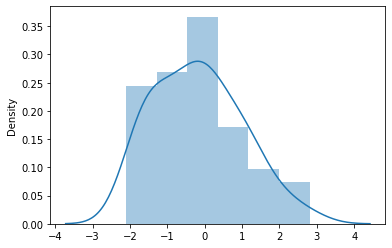

In [29]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [35]:
from sklearn.preprocessing import MinMaxScaler

##### instânciando o objeto scaler

In [36]:
scaler = MinMaxScaler().fit(data)

##### transformando os dados com o objeto scaler

In [32]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[0.6293015 ]
 [0.19777248]
 [0.8431408 ]
 [0.4908511 ]
 [0.28714726]
 [0.4001213 ]
 [0.12887315]
 [0.55587319]
 [0.65120099]
 [0.40464354]
 [0.12701811]
 [0.48359784]
 [0.35226784]
 [0.4682723 ]
 [0.06516678]
 [0.86380808]
 [0.44944455]
 [0.70109424]
 [0.59521978]
 [0.32827731]
 [0.48681955]
 [0.38091153]
 [0.06565832]
 [0.55477591]
 [0.31148915]
 [0.37646073]
 [0.42623927]
 [0.62653963]
 [0.48906635]
 [0.33389397]
 [0.18634195]
 [0.        ]
 [0.09428574]
 [0.16838265]
 [1.        ]
 [0.20427703]
 [0.40453074]
 [0.22640462]
 [0.7118946 ]
 [0.07129375]
 [0.74092003]
 [0.2684818 ]
 [0.68139967]
 [0.59289143]
 [0.07288716]
 [0.29961262]
 [0.0465569 ]
 [0.12525211]
 [0.41967453]
 [0.19709929]]


#### Alterando a forma dos dados para apenas uma dimensão

In [37]:
data_scaled = data_scaled.reshape(-1,1)

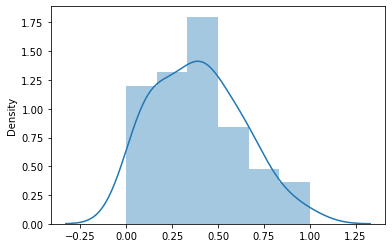

In [38]:
sns.distplot(data_scaled)
plt.show()

## **StandardScaler** - Técnica de Pré-Processamento

* Padroniza a escala dos dados sem interferir na sua forma

* Mantém a escala dos dados mais fiel que a Técnica MinMaxScale

In [39]:
data = np.random.normal(size = 50)
print(data)

[ 0.92467794 -0.21411502 -1.03152488  0.0525514  -0.34417849 -2.06318265
 -1.79972741 -0.49404448  1.2952335   1.65705474  1.04904289 -1.6961479
 -1.0399514  -1.75823709 -1.97062009 -1.21979079  1.52426314 -0.57898852
 -0.61347982  0.76810308 -2.32237176 -0.05823148 -1.22754233  0.50455041
 -1.00712692 -0.57330142  2.05109693  1.93488175 -0.39977329  0.67017853
  0.91854264  0.0390745  -0.13565311  0.74581048 -1.76412944 -0.45516212
 -0.28028748  0.92620056 -0.34436953 -1.23373517  0.2626977   0.91299017
  1.6351753   0.70337627 -0.72990932 -1.60768995 -0.28490418 -0.3550056
 -0.89633944  1.29258962]


#### Alterando a forma dos dados para apenas uma dimensão

In [40]:
data = data.reshape(-1,1)

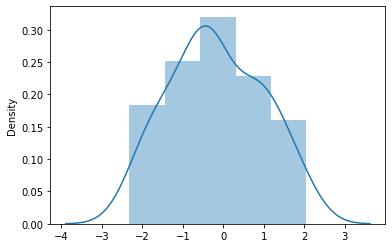

In [41]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [42]:
from sklearn.preprocessing import StandardScaler

##### instânciando o objeto scaler

In [43]:
scaler = StandardScaler().fit(data)

##### transformando os dados com o objeto scaler

In [44]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[ 0.9687334 ]
 [-0.0366254 ]
 [-0.75825806]
 [ 0.1987953 ]
 [-0.15144913]
 [-1.66903487]
 [-1.43644909]
 [-0.28375508]
 [ 1.29587038]
 [ 1.61529646]
 [ 1.07852631]
 [-1.34500615]
 [-0.76569723]
 [-1.39982026]
 [-1.58731801]
 [-0.92446456]
 [ 1.49806426]
 [-0.3587461 ]
 [-0.38919599]
 [ 0.83050466]
 [-1.89785438]
 [ 0.10099302]
 [-0.93130784]
 [ 0.59783287]
 [-0.73671884]
 [-0.35372537]
 [ 1.9631681 ]
 [ 1.86057003]
 [-0.20052979]
 [ 0.74405409]
 [ 0.96331698]
 [ 0.18689751]
 [ 0.03264301]
 [ 0.81082412]
 [-1.40502219]
 [-0.24942863]
 [-0.09504433]
 [ 0.97007761]
 [-0.15161778]
 [-0.93677506]
 [ 0.38431842]
 [ 0.9584151 ]
 [ 1.59598067]
 [ 0.77336199]
 [-0.49198327]
 [-1.26691296]
 [-0.09912009]
 [-0.16100761]
 [-0.63891251]
 [ 1.29353629]]


#### Alterando a forma dos dados para apenas uma dimensão

In [45]:
data_scaled = data_scaled.reshape(-1,1)

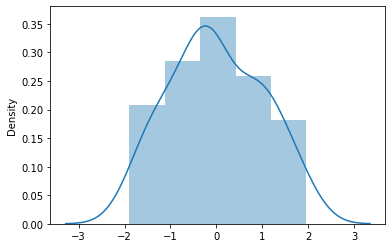

In [46]:
sns.distplot(data_scaled)
plt.show()